# Import Libraries for Web Scrapping

In [1]:
from selenium import webdriver
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Web Scrapping for Disease Prediction

In [2]:
url = "https://impact.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html"
response = requests.get(url, verify = False)
soup = BeautifulSoup(response.text, 'html.parser')

C:\Users\giris\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'impact.dbmi.columbia.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
# Find the table containing the dataset
table = soup.find('table')

In [4]:
# Find all rows in the table
rows = table.find_all('tr')

In [5]:
# Initialize an empty list to store the data
data = []

In [6]:
# Iterate through each row in the table
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 3:
        # remove newline characters from the text
        cleaned_cells = [cell.text.replace('\n', '') for cell in cells]
        data.append(cleaned_cells)

In [7]:
#Convert the data into Dataframe
df = pd.DataFrame(data)
df.head(5)

,0,1,2
0,Disease,Count of Disease Occurrence,Symptom
1,UMLS:C0020538_hypertensive disease,3363,UMLS:C0008031_pain chest
2,,,UMLS:C0392680_shortness of breath
3,,,UMLS:C0012833_dizziness
4,,,UMLS:C0004093_asthenia


# Data Cleaning

In [8]:
df.columns = df.iloc[0]

In [9]:
df = df.drop(df.index[0])

In [10]:
df.head(15)

,Disease,Count of Disease Occurrence,Symptom
1,UMLS:C0020538_hypertensive disease,3363,UMLS:C0008031_pain chest
2,,,UMLS:C0392680_shortness of breath
3,,,UMLS:C0012833_dizziness
4,,,UMLS:C0004093_asthenia
5,,,UMLS:C0085639_fall
6,,,UMLS:C0039070_syncope
7,,,UMLS:C0042571_vertigo
8,,,UMLS:C0038990_sweat^UMLS:C0700590_sweating in...
9,,,UMLS:C0030252_palpitation
10,,,UMLS:C0027497_nausea


In [11]:
#Remove 14 Character Code from the Text
df['Disease'] = df['Disease'].str.slice(14)
df['Symptom'] = df['Symptom'].str.slice(14)

In [12]:
df.head(10)

,Disease,Count of Disease Occurrence,Symptom
1,hypertensive disease,3363,pain chest
2,,,shortness of breath
3,,,dizziness
4,,,asthenia
5,,,fall
6,,,syncope
7,,,vertigo
8,,,sweat^UMLS:C0700590_sweating increased
9,,,palpitation
10,,,nausea


In [13]:
# Remove 1 symptom from the cell having 2 symptoms
df["Symptom"] = df["Symptom"].str.split("^").str[0]
df["Disease"] = df["Disease"].str.split("^").str[0]

In [14]:
df.head(8)

,Disease,Count of Disease Occurrence,Symptom
1,hypertensive disease,3363,pain chest
2,,,shortness of breath
3,,,dizziness
4,,,asthenia
5,,,fall
6,,,syncope
7,,,vertigo
8,,,sweat


In [15]:
df = df.drop(df.columns[1], axis = 1)

In [16]:
df.head(5)

,Disease,Symptom
1,hypertensive disease,pain chest
2,,shortness of breath
3,,dizziness
4,,asthenia
5,,fall


In [17]:
def remove_double_spaces(text):
    return text.replace("  "," ")

df['Symptom'] = df['Symptom'].apply(remove_double_spaces)

# Symptoms Dataframe

In [18]:
# Create a list of unique values from the Symptom column
symptoms = df['Symptom'].unique().tolist()
symptoms = np.sort(symptoms)

# Create an empty dataframe with the unique values as column headers
df_symptoms = pd.DataFrame(columns=symptoms)

In [19]:
df_symptoms

,,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum


### Encode the Labels

In [20]:
'''This code is using the LabelEncoder class from the scikit-learn library to encode the categorical variable "Symptom" 
in the dataframe "df" into numerical values. The fit_transform method is applied to the "Symptom" column, which fits the 
encoder to the data and then transforms it into numerical values that are stored in the "integer_encoded" variable.'''

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Symptom'])
integer_encoded

array([252, 323,  84, ..., 355, 127, 119])

In [21]:
# One Hot Encode the Labels

'''One hot encoding is a process of converting categorical variables into a numerical form, 
so that they can be used as input in machine learning models. In this process, each category 
is represented as a binary vector, with a single "1" value indicating the presence of a category, 
and all other values being "0". This results in a sparse matrix representation of the data, 
where most entries are zero. One hot encoding helps to handle categorical variables in machine 
learning models, where numerical data is expected as input.'''

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\giris\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
onehot_encoded.shape

(1866, 397)

In [23]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
for i in range(len(onehot_encoded)):
    df_symptoms.loc[i] = onehot_encoded[i]

In [25]:
df_symptoms.head()

,,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.head()

,Disease,Symptom
1,hypertensive disease,pain chest
2,,shortness of breath
3,,dizziness
4,,asthenia
5,,fall


In [27]:
df.to_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training1.csv", index=False)
df = pd.read_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training1.csv")

In [28]:
# Fill all NaN with the values above
df = df.fillna(method='ffill')

In [29]:
df.head()

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall


In [30]:
df.isna().sum()

Disease    0
Symptom    0
dtype: int64

In [31]:
n_unique = len(df['Symptom'].unique())
n_unique

396

# Disease Dataframe

In [32]:
df_disease = df['Disease']
df_disease.head()

0    hypertensive  disease
1    hypertensive  disease
2    hypertensive  disease
3    hypertensive  disease
4    hypertensive  disease
Name: Disease, dtype: object

# Combine Dataframe

In [33]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_symptoms], axis=1)
df_concat.head()

,Disease,,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [35]:
df_concat.head()

,Disease,,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_concat.shape

(1855, 398)

In [37]:
df_concat = df_concat.groupby('Disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,Disease,,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,acquired immuno-deficiency syndrome,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adenocarcinoma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_concat.shape

(133, 398)

### Save Dataset to CSV

In [39]:
df_concat.to_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training1.csv", index=False)

### Importing All three Dataset

In [40]:
df1 = pd.read_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training.csv")  #Scrap Dataset from Wikipedia
df2 = pd.read_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training1.csv") #Scrap Dataset from columbia Educational site 
df3 = pd.read_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\Training2.csv") #Dataset from Kaggle

In [41]:
# Merge the three DataFrames into a single DataFrame
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Drop duplicate columns, keeping the first occurrence of each column
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

#Replce all NAN as zero
merged_df = merged_df.fillna(0)

#Remove Duplicates Rows
merged_df = merged_df.drop_duplicates()

# Save the merged DataFrame to a new file
merged_df.to_csv(r"C:\Users\giris\OneDrive\Desktop\WeSchool PGDM\Trim 5\Dataset\merged_dataset.csv", index=False)

In [42]:
merged_df.head()

,Disease,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,...,weakness numbness affected leg,webbed neck,wet,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin crust
0,Fungal infection,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal infection,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal infection,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal infection,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
merged_df = merged_df.drop(columns=['Unnamed: 1'])

In [44]:
merged_df.shape

(9272, 962)

# Model Training

### Import Libraries 

In [45]:
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
# creation of features and label for training the models
X = merged_df.iloc[:, 1:]
Y = merged_df.iloc[:, 0:1]

In [47]:
X.head()

,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,ulcers on tongue,...,weakness numbness affected leg,webbed neck,wet,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin crust
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
Y.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


### Train-test split

In [49]:
# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [50]:
# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []
precision_list = []
recall_list = []
f1_score_list = []

# Logistic Regression Classifier

Logistic Regression uses OvR (One Vs Rest) approach when classification is multi class.

In [51]:
# LR Classifier
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# prediction of labels for the test data
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)

#For Plot
accuracy_list.append(acc_lr)
model_list.append("LR")

print(f"Accuracy (LR) : {acc_lr}%")

Accuracy (LR) : 87.17%


In [52]:
#5-fold Cross-validation 

'''5-fold cross-validation is a technique used to evaluate the performance of a machine learning model.
In this technique, the original dataset is divided into 5 equal parts or folds. 
The model is trained on 4 of these folds and tested on the remaining 1 fold. 
This process is repeated 5 times, each time with a different fold as the test set, 
and the performance of the model is evaluated by computing an accuracy metric'''

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Create the classifier (Logistic Regression in this case)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(clf, X, Y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(clf, X, Y, cv=k, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X, Y, cv=k, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X, Y, cv=k, scoring='f1_weighted')

# Compute the average of the metrics over all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

#For Plot
cross_accuracy_list.append(avg_accuracy)
precision_list.append(avg_precision)
recall_list.append(avg_recall)
f1_score_list.append(avg_f1)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.8792211492889273
Average Precision: 0.8613844829956486
Average Recall: 0.8792211492889273
Average F1 Score: 0.8609307921798207


# Decision Tree Classifier

DT is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression. DT follows a tree like structure to reach to a decision whether the given sample under consideration belong to which class.

In [53]:
# DT Classifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

# prediction of labels for the test data
dt_pred = dt.predict(x_test)

# calculation of accuracy score based on predictions performed
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)

# for plot
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

Accuracy (DT) : 80.00%


In [54]:
# Create the classifier
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(clf, X, Y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(clf, X, Y, cv=k, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X, Y, cv=k, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X, Y, cv=k, scoring='f1_weighted')

# Compute the average of the metrics over all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

#For Plot
cross_accuracy_list.append(avg_accuracy)
precision_list.append(avg_precision)
recall_list.append(avg_recall)
f1_score_list.append(avg_f1)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.8137668681687733
Average Precision: 0.8538635049064587
Average Recall: 0.8129042181689187
Average F1 Score: 0.8173718015565209


# Random Forest Classifier

RF classifier is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and take the average to improve predicting accuracy.

In [55]:
# RF Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(x_train, y_train)

# prediction of labels for the test data
rf_pred = rf.predict(x_test)

# calculation of accuracy score based on predictions performed
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)

# for plot
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

Accuracy (RF) : 85.01%


In [56]:
# Create the classifier
clf = RandomForestClassifier()

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(clf, X, Y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(clf, X, Y, cv=k, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X, Y, cv=k, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X, Y, cv=k, scoring='f1_weighted')

# Compute the average of the metrics over all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

#For Plot
cross_accuracy_list.append(avg_accuracy)
precision_list.append(avg_precision)
recall_list.append(avg_recall)
f1_score_list.append(avg_f1)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.8757733988142486
Average Precision: 0.8844312106292266
Average Recall: 0.8752339663349005
Average F1 Score: 0.8714124118116718


# K-Nearest Neighbor Classifier

The principle behind nearest neighbor method is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. No. of samples used here is 15.

In [57]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn = knn.fit(x_train, y_train)

# prediction of labels for the test data
knn_pred = knn.predict(x_test)

# calculation of accuracy score based on predictions performed
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)

# for plot
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

Accuracy (KNN) : 85.12%


In [58]:
# Create the classifier
clf = KNeighborsClassifier()

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(clf, X, Y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(clf, X, Y, cv=k, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X, Y, cv=k, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X, Y, cv=k, scoring='f1_weighted')

# Compute the average of the metrics over all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

#For Plot
cross_accuracy_list.append(avg_accuracy)
precision_list.append(avg_precision)
recall_list.append(avg_recall)
f1_score_list.append(avg_f1)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.8283236943797487
Average Precision: 0.8811750971620127
Average Recall: 0.8283236943797487
Average F1 Score: 0.8353123210137795


# Multinomial Naive Bayes Classifier

MNB works better on discrete features and the multinomial distribution usually requires integer counts. However, it also works with fractional counts such tf-idf.

In [59]:
# Multinomial NB Classifier
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

# prediction of labels for the test data
mnb_pred = mnb.predict(x_test)

# calculation of accuracy score based on predictions performed
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)

#For Plot
accuracy_list.append(acc_mnb)
model_list.append("MNB")

print(f"Accuracy (MNB) : {acc_mnb}%")

Accuracy (MNB) : 78.65%


In [60]:
# Create the classifier
clf = MultinomialNB()

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(clf, X, Y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(clf, X, Y, cv=k, scoring='precision_weighted')
recall_scores = cross_val_score(clf, X, Y, cv=k, scoring='recall_weighted')
f1_scores = cross_val_score(clf, X, Y, cv=k, scoring='f1_weighted')

# Compute the average of the metrics over all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

#For Plot
cross_accuracy_list.append(avg_accuracy)
precision_list.append(avg_precision)
recall_list.append(avg_recall)
f1_score_list.append(avg_f1)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.7967125207535538
Average Precision: 0.7274933064466155
Average Recall: 0.7967125207535538
Average F1 Score: 0.7418875734966698


# Support Vector Machine Classifier

SVM follows OvO (One Vs One) scheme when dealing with multi class classification. SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. This seems simple for binary class but the complexity is increased when we have multiple classes. In our classification problem we have 9272 classes (equal to diseases).

# Accuracy Comparison Plot for all the classifiers

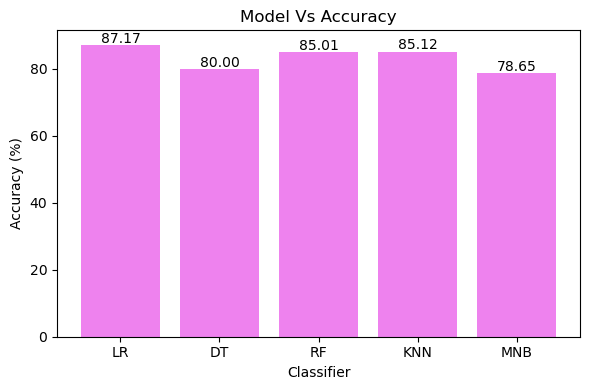

In [61]:
#create the subplots
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

#Title
plt.title("Model Vs Accuracy")

#Labels
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

#Plot Bar Chart
plt.bar(model_list, accuracy_list, color='violet')

#Append Values
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.2, float(j)+0.7, str(j), color='Black')
 
plt.tight_layout()    
plt.show()

# Cross Validation Accuracy Comparison Plot for all the classifiers

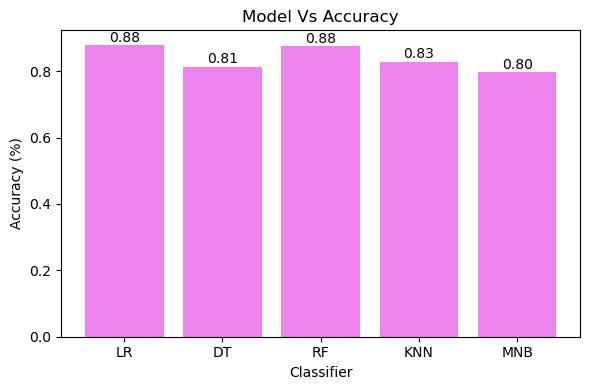

In [62]:
# Create subplots
fig, ax = plt.subplots(figsize=(6, 4))

# Title and labels
ax.set_title("Model Vs Accuracy")
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (%)')

# Plot bar chart
ax.bar(model_list, cross_accuracy_list, color='violet')

# Append values
for x, y in zip(model_list, cross_accuracy_list):
    ax.text(x, y + 0.01, '{:.2f}'.format(y), color='black', ha='center')

plt.tight_layout()
plt.show()


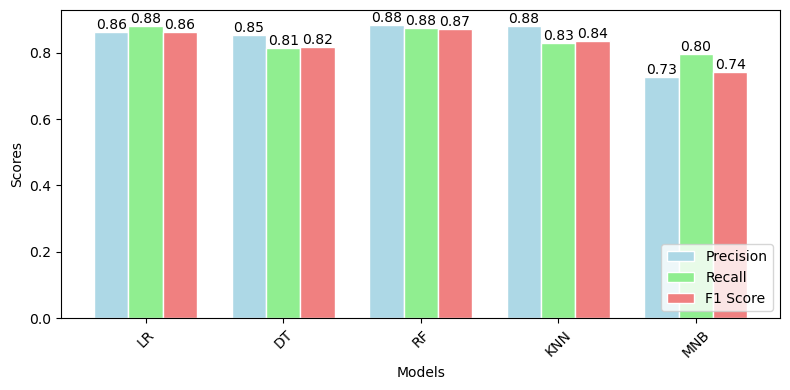

In [63]:
# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r = np.arange(len(model_list))

# Set the figure size
plt.figure(figsize=(8,4))

# Plot the precision, recall, and F1 score with faint colors
plt.bar(r, precision_list, color='lightblue', edgecolor='white', width=bar_width, label='Precision')
plt.bar(r + bar_width, recall_list, color='lightgreen', edgecolor='white', width=bar_width, label='Recall')
plt.bar(r + 2 * bar_width, f1_score_list, color='lightcoral', edgecolor='white', width=bar_width, label='F1 Score')

# Add x-axis labels and tick labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(r + bar_width, model_list, rotation=45)

# Add a legend
plt.legend(loc = 'lower right')

# Add figure values at the top of each bar
for i, scores in enumerate(zip(precision_list, recall_list, f1_score_list)):
    for j, score in enumerate(scores):
        plt.text(r[i] + j * bar_width, score, '{:.2f}'.format(score), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


# Prediction of Disease from User Inputs

In [64]:
# Scrap the list of synonyms of the input word from thesaurus.com (https://www.thesaurus.com/) 
# and wordnet (https://www.nltk.org/howto/wordnet.html)

def synonyms(term):
    synonyms = []
    response = requests.get('https://www.thesaurus.com/browse/{}'.format(term))
    soup = BeautifulSoup(response.content,  "html.parser")
    try:
        container=soup.find('section', {'class': 'MainContentContainer'}) 
        row=container.find('div',{'class':'css-191l5o0-ClassicContentCard'})
        row = row.find_all('li')
        for x in row:
            synonyms.append(x.get_text())
    except:
        None
    for syn in wordnet.synsets(term):
        synonyms+=syn.lemma_names()
    return set(synonyms)

In [65]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from itertools import combinations
import requests

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
# utlities for pre-processing
stop_words = stopwords.words('english') #Removing stop workds like the", "a", "an", "in", etc.

lemmatizer = WordNetLemmatizer() #process of reducing a word to its base form or root

splitter = RegexpTokenizer(r'\w+')  #process of splitting a text into individual words or phrases, also known as tokens

In [78]:
# Taking symptoms from user as input 
user_symptoms = str(input("Please enter symptoms separated by comma(,):\n")).lower().split(',')

# Preprocessing the input symptoms
processed_user_symptoms=[]
for sym in user_symptoms:
    sym=sym.strip()
    sym=sym.replace('-',' ')
    sym=sym.replace("'",'')
    sym = ' '.join([lemmatizer.lemmatize(word) for word in splitter.tokenize(sym)])
    processed_user_symptoms.append(sym)

Please enter symptoms separated by comma(,):
Fever, Headache, Cough, Body Ache, Difficult to Breath


In [79]:
# Taking each user symptom and finding all its synonyms and appending it to the pre-processed symptom string
user_symptoms = []
for user_sym in processed_user_symptoms:
    user_sym = user_sym.split()
    str_sym = set()
    for comb in range(1, len(user_sym)+1):
        for subset in combinations(user_sym, comb):
            subset=' '.join(subset)
            subset = synonyms(subset) 
            str_sym.update(subset)
    str_sym.add(' '.join(user_sym))
    user_symptoms.append(' '.join(str_sym).replace('_',' '))
    
    
# query expansion performed by joining synonyms found for each symptoms initially entered
#print("After query expansion done by using the symptoms entered")
print(user_symptoms)

['pyrexia feverishness fever febricity febrility', 'head ache vexation concern worry cephalalgia headache', 'cough coughing', 'consistence ache body ache personify yearn torso trunk body pine physical structure yen hurt aching organic structure smart consistency dead body suffer eubstance languish soundbox', 'breath breathing spell unmanageable breathing space difficult hint difficult to breath hard breathing place breathing time intimation breather']


In [93]:
# Loop over all the symptoms in dataset and check its similarity score to the synonym string of the user-input 
# symptoms. If similarity>0.5, add the symptom to the final list
# List of symptoms

dataset_symptoms = list(X.columns)
found_symptoms = set()
for idx, data_sym in enumerate(dataset_symptoms):
    data_sym_split=data_sym.split()
    for user_sym in user_symptoms:
        count=0
        for symp in data_sym_split:
            if symp in user_sym.split():
                count+=1
        if count/len(data_sym_split)>0.5:
            found_symptoms.add(data_sym)
found_symptoms = list(found_symptoms)

found_symptoms

['ache', 'headache', 'cough', 'fever', 'coughing', 'worry', 'aching']

In [94]:
# Print all found symptoms
print("Top matching symptoms from your search!")
for idx, symp in enumerate(found_symptoms):
    print(idx,":",symp)
    
# Show the related symptoms found in the dataset and ask user to select among them
select_list = input("\nPlease select the relevant symptoms. Enter indices (separated-space):\n").split()

# Find other relevant symptoms from the dataset based on user symptoms based on the highest co-occurance with the
# ones that is input by the user
dis_list = set()
final_symp = [] 
counter_list = []

for idx in select_list:
    symp=found_symptoms[int(idx)]
    final_symp.append(symp)
    dis_list.update(set(merged_df[merged_df[symp]==1]['Disease']))
   
for dis in dis_list:
    row = merged_df.loc[merged_df['Disease'] == dis].values.tolist()
    row[0].pop(0)
    for idx,val in enumerate(row[0]):
        if val!=0 and dataset_symptoms[idx] not in final_symp:
            counter_list.append(dataset_symptoms[idx])

Top matching symptoms from your search!
0 : ache
1 : headache
2 : cough
3 : fever
4 : coughing
5 : worry
6 : aching

Please select the relevant symptoms. Enter indices (separated-space):
1 2 3 4 5 6


In [95]:
# Symptoms that co-occur with the ones selected by user              
from collections import Counter
import operator
dict_symp = dict(Counter(counter_list))
dict_symp_tup = sorted(dict_symp.items(), key=operator.itemgetter(1),reverse=True)   
#print(dict_symp_tup) 

In [96]:
# Iteratively, suggest top co-occuring symptoms to the user and ask to select the ones applicable 
found_symptoms=[]
count=0
for tup in dict_symp_tup:
    count+=1
    found_symptoms.append(tup[0])
    if count%5==0 or count==len(dict_symp_tup):
        print("\nCommon co-occuring symptoms:")
        for idx,ele in enumerate(found_symptoms):
            print(idx,":",ele)
        select_list = input("Do you have have of these symptoms? If Yes, enter the indices (space-separated), 'no' to stop, '-1' to skip:\n").lower().split();
        if select_list[0]=='no':
            break
        if select_list[0]=='-1':
            found_symptoms = [] 
            continue
        for idx in select_list:
            final_symp.append(found_symptoms[int(idx)])
        found_symptoms = [] 


Common co-occuring symptoms:
0 : vomiting
1 : pain
2 : chill
3 : shortness of breath
4 : nausea
Do you have have of these symptoms? If Yes, enter the indices (space-separated), 'no' to stop, '-1' to skip:
3

Common co-occuring symptoms:
0 : agitation
1 : diarrhea
2 : fatigue
3 : apyrexial
4 : hallucinations auditory
Do you have have of these symptoms? If Yes, enter the indices (space-separated), 'no' to stop, '-1' to skip:
no


In [97]:
# Create query vector based on symptoms selected by the user
print("\nFinal list of Symptoms that will be used for prediction:")
sample_x = [0 for x in range(0,len(dataset_symptoms))]
for val in final_symp:
    print(val)
    sample_x[dataset_symptoms.index(val)]=1


Final list of Symptoms that will be used for prediction:
headache
cough
fever
coughing
worry
aching
shortness of breath


In [98]:
# Predict disease
prediction = rf.predict_proba([sample_x])
scores = cross_val_score(rf, X, Y, cv=5)

In [99]:
# top k (10) diseases with the highest predicted probabilities using the argsort method.

k = 10
diseases = list(set(Y['Disease']))
diseases.sort()
topk = prediction[0].argsort()[-k:][::-1]

In [100]:
from statistics import mean

print(f"\nTop {k} diseases predicted based on symptoms")

topk_dict = {}

# Show top 10 highly probable disease to the user.
for idx,t in enumerate(topk):
    match_sym=set()
    row = merged_df.loc[merged_df['Disease'] == diseases[t]].values.tolist()
    row[0].pop(0)
    
    for idx,val in enumerate(row[0]):
        if val!=0:
            match_sym.add(dataset_symptoms[idx])
    prob = (len(match_sym.intersection(set(final_symp)))+1)/(len(set(final_symp))+1)
    prob *= mean(scores)
    topk_dict[t] = prob
    
j = 0
topk_index_mapping = {}
topk_sorted = dict(sorted(topk_dict.items(), key=lambda kv: kv[1], reverse=True))

for key in topk_sorted:
  prob = topk_sorted[key]*100
  print(str(j) + " Disease name:",diseases[key], "\tProbability:",str(round(prob, 2))+"%")
  topk_index_mapping[j] = key
  j += 1



Top 10 diseases predicted based on symptoms
0 Disease name: mitral  valve insufficiency 	Probability: 21.4%
1 Disease name: obesity  morbid 	Probability: 21.4%
2 Disease name: Hypertension  	Probability: 21.4%
3 Disease name: Herpes Simplex 	Probability: 21.4%
4 Disease name: Hypothyroid 	Probability: 10.7%
5 Disease name: Chronic obstructive pulmonary disease (COPD) 	Probability: 10.7%
6 Disease name: Hepatitis B 	Probability: 10.7%
7 Disease name: Hepatitis C 	Probability: 10.7%
8 Disease name: Hepatitis D 	Probability: 10.7%
9 Disease name: Hepatitis E 	Probability: 10.7%
